In [ ]:
# 1.линейчатый график обычно используется для визуализации динамики, для отображения количества фильмов в разерезе рейтинга 
# лучше было использовать столбчатую диаграмму;
# -2. если вы видите, что с представлением данных на визуализации что-то не то (например подписи осей перекрывают друг друга), 
# то это надо исправлять (менять размерность графика/оси, размер шрифтов и пр.);
# -3. предпоследняя визуализация у вас вообще не читается, лучше подумать о другом типе для более наглядного отображения
# информации;
# - просьба уделять больше внимания базовым настройкам визуализаций (подписи и значения по осям, легенда, заголовок и т.д.), 
# т.к. любая визуализация должна хорошо читаться даже в отрыве от контекста. У вас это соблюдается не везде.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
titles = pd.read_csv('netflix_titles.csv')
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Text(0, 0.5, 'Количество фильмов')

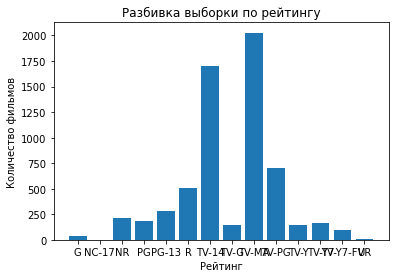

In [52]:
# 1.
titles1 = titles.groupby(['rating']).count()
plt.bar(titles1.index, titles1.show_id)
plt.title('Разбивка выборки по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')

In [51]:
# два типа массовых рейтингов при производстве фильмов Нетфликс - tv14, tvma 

In [46]:
titles2 = titles[titles['rating']. isin (['TV-14', 'TV-MA'])]
# отфильтруем по массовым рейтингам и сгруппируем по режиссерам
grouped = titles2.groupby(['director']).count()
grouped_top= grouped.sort_values('rating', ascending=False)[:10]


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

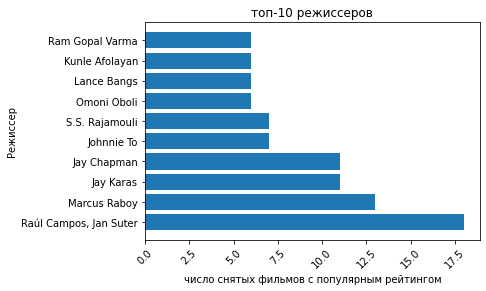

In [49]:
# 2.
plt.barh(grouped_top.index, grouped_top.rating)
plt.title("топ-10 режиссеров")
plt.xlabel("число снятых фильмов с популярным рейтингом")
plt.ylabel("Режиссер")
plt.xticks(rotation=45) 

In [7]:
# выделяется четверка наиболее плодовитых режиссеров

In [120]:
titles3 = titles[['rating','country']]
# посмотрим в разрезе стран- производителей  и исключим совместное производство
pivot = titles3.pivot_table(index='rating', columns='country', aggfunc='size', fill_value=0)
pivot2 = pivot.filter(items=[i for i in pivot.columns if ',' not in i])
pivot3 = pivot2[[col for col in pivot2 if not sum(set(pivot2[col])) < 100]]

Text(0, 0.5, 'число фильмов')

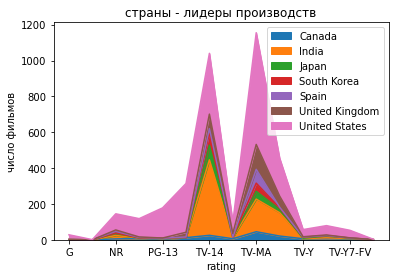

In [123]:
# 3.
pivot3.plot(kind='area')
plt.title("страны - лидеры производств")
plt.legend (loc='upper right')
plt.ylabel('число фильмов')

In [67]:
import seaborn as sns

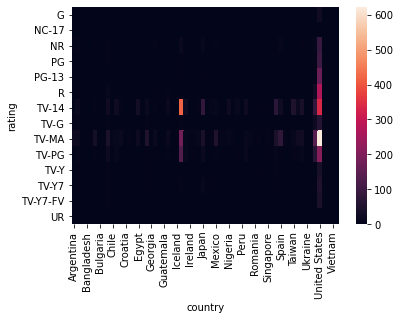

In [14]:
sns.heatmap(pivot2)

In [ ]:
#  по тепловой карте США также лидер производства.Индия показана цветом.